<a href="https://colab.research.google.com/github/antran28/Netflix-SQL-ERD/blob/main/Code_iPython_Notebook_An_Tran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 2: Data Processing Using Python** 

## Business Problem

The main goals of this analysis are as follows:

•	Assessing the efficiency of Facebook posts in increasing brand awareness

•	Identifying the impact of Facebook post factors such as time post, frequency, post types on customer reactions and engagement

•	Defining a causal relation between the use of social media and customer relationship management by evaluating lifetime post reach and engagement ratio


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format

## Reading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read data from file
df = pd.read_csv('/content/drive/MyDrive/Facebook_Metrics/Dataset_Facebook.csv')

#print data in the jupyter notebook
df

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.000,2752,5091,178,109,159,3078,1640,119,4,79.000,17.000,100
1,139441,Status,2,12,3,10,0.000,10460,19057,1457,1361,1674,11710,6112,1108,5,130.000,29.000,164
2,139441,Photo,3,12,3,3,0.000,2413,4373,177,113,154,2812,1503,132,0,66.000,14.000,80
3,139441,Photo,2,12,2,10,1.000,50128,87991,2211,790,1119,61027,32048,1386,58,1572.000,147.000,1777
4,139441,Photo,2,12,2,3,0.000,7244,13594,671,410,580,6228,3200,396,19,325.000,49.000,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.000,4684,7536,733,708,985,4750,2876,392,5,53.000,26.000,84
496,81370,Photo,2,1,5,8,0.000,3480,6229,537,508,687,3961,2104,301,0,53.000,22.000,75
497,81370,Photo,1,1,5,2,0.000,3778,7216,625,572,795,4742,2388,363,4,93.000,18.000,115
498,81370,Photo,3,1,4,11,0.000,4156,7564,626,574,832,4534,2452,370,7,91.000,38.000,136


In [ ]:
#store the data in data frame and print the result
df.count()
df = pd.DataFrame(df)

print(df)

     Page total likes    Type  Category  ...     like   share  Total Interactions
0              139441   Photo         2  ...   79.000  17.000                 100
1              139441  Status         2  ...  130.000  29.000                 164
2              139441   Photo         3  ...   66.000  14.000                  80
3              139441   Photo         2  ... 1572.000 147.000                1777
4              139441   Photo         2  ...  325.000  49.000                 393
..                ...     ...       ...  ...      ...     ...                 ...
495             85093   Photo         3  ...   53.000  26.000                  84
496             81370   Photo         2  ...   53.000  22.000                  75
497             81370   Photo         1  ...   93.000  18.000                 115
498             81370   Photo         3  ...   91.000  38.000                 136
499             81370   Photo         2  ...   91.000  28.000                 119

[500 rows x 19 

In [ ]:
#summary the dataset
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.000,2752,5091,178,109,159,3078,1640,119,4,79.000,17.000,100
1,139441,Status,2,12,3,10,0.000,10460,19057,1457,1361,1674,11710,6112,1108,5,130.000,29.000,164
2,139441,Photo,3,12,3,3,0.000,2413,4373,177,113,154,2812,1503,132,0,66.000,14.000,80
3,139441,Photo,2,12,2,10,1.000,50128,87991,2211,790,1119,61027,32048,1386,58,1572.000,147.000,1777
4,139441,Photo,2,12,2,3,0.000,7244,13594,671,410,580,6228,3200,396,19,325.000,49.000,393


In [ ]:
df.tail()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
495,85093,Photo,3,1,7,2,0.000,4684,7536,733,708,985,4750,2876,392,5,53.000,26.000,84
496,81370,Photo,2,1,5,8,0.000,3480,6229,537,508,687,3961,2104,301,0,53.000,22.000,75
497,81370,Photo,1,1,5,2,0.000,3778,7216,625,572,795,4742,2388,363,4,93.000,18.000,115
498,81370,Photo,3,1,4,11,0.000,4156,7564,626,574,832,4534,2452,370,7,91.000,38.000,136
499,81370,Photo,2,1,4,4,NaN,4188,7292,564,524,743,3861,2200,316,0,91.000,28.000,119


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [ ]:
#print the shape of the dataframe
print(df.shape)

(500, 19)


In [ ]:
#print the list of columns in the datafram
print(df.columns)

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')


## Checking Null Values In The Dataset

In [ ]:
#find missing values in the dataset
df.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

There are total of 6 null values in the dataset, 4 from "Total Interactions", 1 from "Lifetime Post Total Reach" and 1 from "Share"

## Checking Missing Values

In [ ]:
#dropping null values from the dataset
df = df.dropna()
print(df.isnull().sum()) #sum of missing values after removal

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

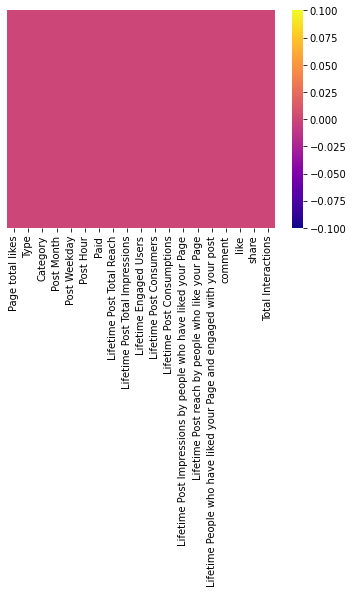

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='plasma')

It is clear from the heatmap that there are no missing value in the dataset that can affect the analysis process

## Checking Duplicate Values

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: {}".format(duplicate_rows_df.shape))
df = df.drop_duplicates()

number of duplicate rows: (0, 19)


## Checking Statistics for Different Data Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     495 non-null    int64  
 1   Type                                                                 495 non-null    object 
 2   Category                                                             495 non-null    int64  
 3   Post Month                                                           495 non-null    int64  
 4   Post Weekday                                                         495 non-null    int64  
 5   Post Hour                                                            495 non-null    int64  
 6   Paid                                                                 495 non-null    float64
 7   Lifetime

In [ ]:
#Checking statistics for columns of the int64 data type
df.describe(include=['int64'])

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,Total Interactions
count,495.000,495.000,495.000,495.000,495.000,495.000,495.000,495.000,495.000,495.000,495.000,495.000,495.000,495.000,495.000
mean,123173.269,1.887,7.028,4.133,7.844,14028.101,29856.982,926.830,804.156,1425.921,16916.279,6641.356,614.135,7.558,213.968
std,16203.818,0.853,3.304,2.031,4.385,22821.050,77142.905,987.713,885.184,2007.663,60074.022,7700.266,614.346,21.274,381.677
min,81370.000,1.000,1.000,1.000,1.000,238.000,570.000,9.000,9.000,9.000,567.000,236.000,9.000,0.000,0.000
25%,112324.000,1.000,4.000,2.000,3.000,3331.000,5798.000,399.000,335.000,512.500,4073.500,2213.000,297.500,1.000,72.000
50%,129600.000,2.000,7.000,4.000,9.000,5290.000,9084.000,630.000,555.000,861.000,6282.000,3478.000,416.000,3.000,125.000
75%,136393.000,3.000,10.000,6.000,11.000,13248.000,22503.000,1062.000,969.000,1479.000,15143.000,8018.000,658.500,7.000,231.000
max,139441.000,3.000,12.000,7.000,23.000,180480.000,1110282.000,11452.000,11328.000,19779.000,1107833.000,51456.000,4376.000,372.000,6334.000


In [ ]:
#Checking statistics for columns of the float64 data type
df.describe(include=['float64'])

,Paid,like,share
count,495.000,495.000,495.000
mean,0.281,179.145,27.265
std,0.450,324.412,42.656
min,0.000,0.000,0.000
25%,0.000,57.000,10.000
50%,0.000,101.000,19.000
75%,1.000,188.000,32.500
max,1.000,5172.000,790.000


In [ ]:
#Checking statistics for columns of the object data type
df.describe(include=['object'])

,Type
count,495
unique,4
top,Photo
freq,421


## Manipulating and Processing Data

In order to assess the impact of Facebook posts on brand awareness, we need to evaluate the engagement raito which is calculated as the number of users interacted divide the number of users who view the post.
Therefore we will create a new attribute: Engagement raito

In [ ]:
df["Engagement ratio"] = (df["Lifetime Engaged Users"])/(df["Lifetime Post Total Reach"])

We also want to assess how often people who see the brand's Facebook post end up clicking it. Therefore we create a new attribute called Click-through rate (CTR). CTR is the number of clicks that your post receives divided by the number of times that your post is shown: 

In [ ]:
df["CTR"] = (df["Lifetime Post Consumers"])/(df["Lifetime Post Total Impressions"])

Check the new attributes that was added to the dataframe.

In [ ]:
df

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Engagement ratio,CTR
0,139441,Photo,2,12,4,3,0.000,2752,5091,178,109,159,3078,1640,119,4,79.000,17.000,100,0.065,0.021
1,139441,Status,2,12,3,10,0.000,10460,19057,1457,1361,1674,11710,6112,1108,5,130.000,29.000,164,0.139,0.071
2,139441,Photo,3,12,3,3,0.000,2413,4373,177,113,154,2812,1503,132,0,66.000,14.000,80,0.073,0.026
3,139441,Photo,2,12,2,10,1.000,50128,87991,2211,790,1119,61027,32048,1386,58,1572.000,147.000,1777,0.044,0.009
4,139441,Photo,2,12,2,3,0.000,7244,13594,671,410,580,6228,3200,396,19,325.000,49.000,393,0.093,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,85093,Photo,3,1,7,10,0.000,5400,9218,810,756,1003,5654,3230,422,10,125.000,41.000,176,0.150,0.082
495,85093,Photo,3,1,7,2,0.000,4684,7536,733,708,985,4750,2876,392,5,53.000,26.000,84,0.156,0.094
496,81370,Photo,2,1,5,8,0.000,3480,6229,537,508,687,3961,2104,301,0,53.000,22.000,75,0.154,0.082
497,81370,Photo,1,1,5,2,0.000,3778,7216,625,572,795,4742,2388,363,4,93.000,18.000,115,0.165,0.079


In [ ]:
# Check the number of attributes:
print("Total number of attributes = ", len(df.columns))

Total number of attributes =  21


In order to run regression analysis on Python, column "Type" and "Paid" need to be converted in to Integer. We will first convert Type category [Photo, Status, Link, Video] into code numbers

In [ ]:
df.Type = pd.Categorical(df.Type)
df["Post Type"] = df.Type.cat.codes


Change Paid data from float into integer

In [ ]:
df["Paid"]=df["Paid"].astype("int64")
#checking data type for Post Type and Paid
print(df)
df.info()

     Page total likes    Type  Category  ...  Engagement ratio   CTR  Post Type
0              139441   Photo         2  ...             0.065 0.021          1
1              139441  Status         2  ...             0.139 0.071          2
2              139441   Photo         3  ...             0.073 0.026          1
3              139441   Photo         2  ...             0.044 0.009          1
4              139441   Photo         2  ...             0.093 0.030          1
..                ...     ...       ...  ...               ...   ...        ...
494             85093   Photo         3  ...             0.150 0.082          1
495             85093   Photo         3  ...             0.156 0.094          1
496             81370   Photo         2  ...             0.154 0.082          1
497             81370   Photo         1  ...             0.165 0.079          1
498             81370   Photo         3  ...             0.151 0.076          1

[495 rows x 22 columns]
<class 'pandas.

## Basic Data Calculations using Pandas and Numpy

Question: 
- what is the average total interaction of a post?
- what is the average engagement ratio of a post?
- what is the average CTR of a post?

In [ ]:

mean1 = np.mean(df['Total Interactions']) 
mean2 = np.mean(df['Engagement ratio'])
mean3 = np.mean(df['CTR'])
### End of the code here

print ("Average interaction per post: "+ str(mean1))
print("Average engagement ratio per post: ", str(mean2))
print("Average click-through rate per post: ", str(mean3))

Average interaction per post: 213.96767676767678
Average engagement ratio per post:  0.12306373949563042
Average click-through rate per post:  0.06323376238520236


## Checking for Outliers

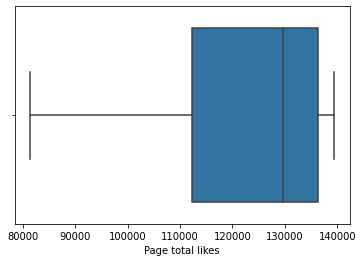

In [ ]:
sns.boxplot(x=df["Page total likes"])

Observation: No outliers in Total page likes attributes

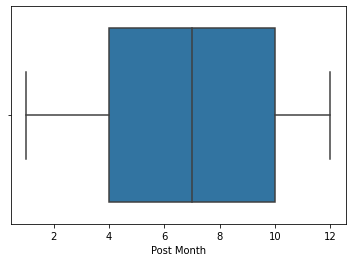

In [ ]:
sns.boxplot(x=df["Post Month"])

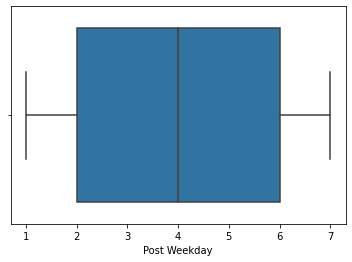

In [ ]:
sns.boxplot(x=df["Post Weekday"])

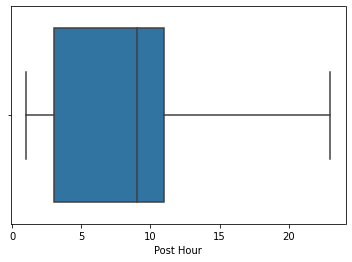

In [ ]:
sns.boxplot(x=df["Post Hour"])

Observation: No outliers in Post Month, Post Weekday, Post Hour

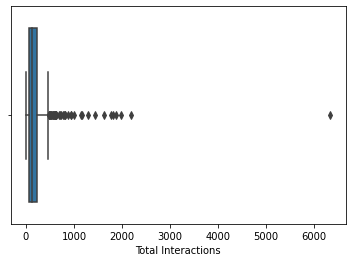

In [ ]:
sns.boxplot(x=df["Total Interactions"])

In [ ]:
#Defining Quartiles for removal of outliers
Q1 = df['Total Interactions'].quantile(0.25) 
Q3 = df['Total Interactions'].quantile(0.75)
IQR = Q3 - Q1 #IQR stands for Interquartile Range(IQR), i.e. difference between teh 75th and 25th pecentiles
total_outlier_num = ((df['Total Interactions'] < (Q1 - 1.5 * IQR)) | (df['Total Interactions'] > (Q3 + 1.5 * IQR))).sum()
#print(IQR)
print("Total Number of Outliers in Total Interactions: {}".format(total_outlier_num))

Total Number of Outliers in Total Interactions: 40


In [ ]:
#post with the highest total interactions
df[df['Total Interactions'] == df['Total Interactions'].max()]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Engagement ratio,CTR,Post Type
244,130791,Photo,2,7,3,5,1,180480,319133,8072,4010,6242,108752,51456,3316,372,5172.000,790.000,6334,0.045,0.013,1


In [ ]:
#post with the lowest total interactions
df[df['Total Interactions'] == df['Total Interactions'].min()]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Engagement ratio,CTR,Post Type
21,138414,Photo,1,12,7,10,0,1384,2467,15,15,20,2196,1172,15,0,0.000,0.000,0,0.011,0.006,1
76,137893,Photo,1,11,3,2,0,1228,2392,17,17,19,2392,1228,17,0,0.000,0.000,0,0.014,0.007,1
100,137020,Photo,1,10,4,9,1,1357,2453,37,37,55,2154,1120,32,0,0.000,0.000,0,0.027,0.015,1
417,104070,Photo,1,3,3,10,0,1874,2474,25,25,31,1483,1062,15,0,0.000,0.000,0,0.013,0.010,1
441,98195,Photo,1,3,5,4,1,1845,2670,9,9,9,1614,1008,9,0,0.000,0.000,0,0.005,0.003,1


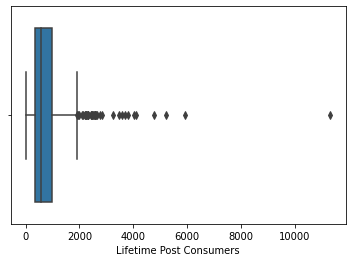

In [ ]:
sns.boxplot(x=df['Lifetime Post Consumers'])

In [ ]:
#Defining Quartiles for removal of outliers
Q1 = df['Lifetime Post Consumers'].quantile(0.25) 
Q3 = df['Lifetime Post Consumers'].quantile(0.75)
IQR = Q3 - Q1 #IQR stands for Interquartile Range(IQR), i.e. difference between teh 75th and 25th pecentiles
total_outlier_num = ((df['Lifetime Post Consumers'] < (Q1 - 1.5 * IQR)) | (df['Lifetime Post Consumers'] > (Q3 + 1.5 * IQR))).sum()
#print(IQR)
print("Total Number of Outliers in Lifetime Post Consumers: {}".format(total_outlier_num))

Total Number of Outliers in Lifetime Post Consumers: 37


## Data Visualization

### Question 1: Does the number of people like the brand's Facebook page increase when brand publish new posts? How does it affect Lifetime Post Consumers?

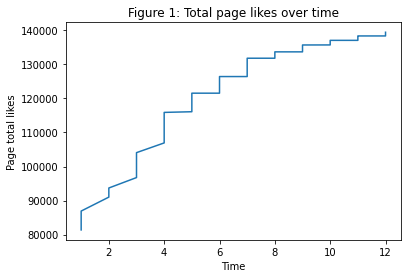

In [ ]:
#create a line graph to show the trend of Page total like over time
fig, ax = plt.subplots()
ax.plot(df["Post Month"], df["Page total likes"])
ax.set_xlabel("Time")
ax.set_ylabel("Page total likes")
plt.title("Figure 1: Total page likes over time")

plt.show()

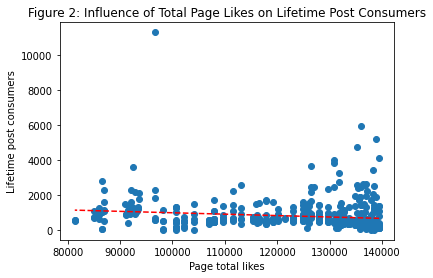

In [ ]:
#create a scatter plot to show the relationship of the number of lifetime post consumers and the number of total page likes, add a trendline
fig, ax = plt.subplots()
x = df["Page total likes"]
y = df["Lifetime Post Consumers"]
ax.scatter(x,y)
ax.set_xlabel("Page total likes")
ax.set_ylabel("Lifetime post consumers")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title("Figure 2: Influence of Total Page Likes on Lifetime Post Consumers")

plt.show()


From the two charts created above, it is clear from Figure 1 that Page Likes increase overtime as brand satisfaction is translated into social media interaction with the company's page. However, we can see that in Figure 2, Lifetime Post Consumers decreased which means users are not so keen to engage with posts being published. Such issue may disclose some erosion of the company's Facebook page, since users are seeing the contents published, but are not interacting with it.

### Question 2: What are the post features that influence more on post total interactions?

A regression analysis model was applied to evaluate which attributes pose an impact on total interaction of the brand's Facebook post. The dependent variable is Total Interactions and the independent variables include: "Category", "Post Month", "Post Hour", "Post Weekday", "Post Type", "Paid".

In [ ]:
from sklearn import linear_model
from statsmodels.formula.api import ols
import statsmodels.api as sm

X = df[["Category", "Post Month", "Post Weekday", "Post Hour", "Post Type", "Paid"]]
Y = df["Total Interactions"]
X = sm.add_constant(X)
model = sm.OLS(Y, X, missing="drop")
results = model.fit()
print(results.summary())



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:     Total Interactions   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.950
Date:                Thu, 21 Oct 2021   Prob (F-statistic):            0.00775
Time:                        11:15:40   Log-Likelihood:                -3635.6
No. Observations:                 495   AIC:                             7285.
Df Residuals:                     488   BIC:                             7315.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           77.7557     86.391      0.900   

From the regression model, there are two factors that have a significantly positive impact on Facebook post total interactions: Category (P-value = 0.006) and Paid (P-value = 0.015).

Categorization features what characterize the post, post category has 3 type: Action, Product, Inspiration. Category of the post would increase post total interactions by 56.0677

It is clear that if brand publish a Facebook post with paid advertisements it can increase post total interactions by 92.4857

Text(0.5, 1.0, 'Figure 3: Density Plot and Histogram of all post category')

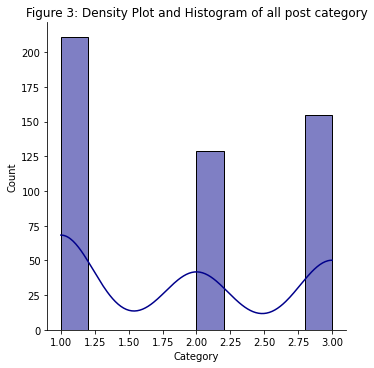

In [ ]:
# Density Plot and Histogram of all post category with count
sns.displot(df['Category'], kde=True, color = 'darkblue')
plt.title("Figure 3: Density Plot and Histogram of all post category")


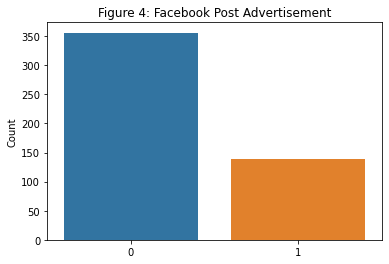

Value count for post: 0    356
1    139
Name: Paid, dtype: int64


In [ ]:
#Creating a bar plot to visualize the count of male and females
sns.barplot(x=df['Paid'].value_counts().index,y=df['Paid'].value_counts().values)
plt.title('Figure 4: Facebook Post Advertisement')
plt.ylabel('Count')
plt.show()
print("Value count for post: {}".format(df['Paid'].value_counts()))

From Figure 3, Action is the most populart category being used to publish a post, followed by Insipration and Product.

Figure 4 show the post distribution of non-paid and paid Facebook post. It is clear that paid post is only accounted for one third of the overall number of post in the survey.

### Question 3: How does social media post influence lifetime post consumers and engagement ratio?

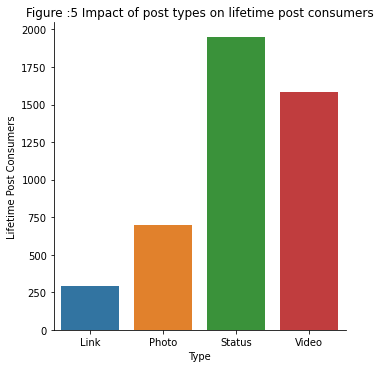

In [ ]:
#create a bar plot to visualize the impact of different post types on lifetime post consumers
sns.catplot(x="Type", y="Lifetime Post Consumers", kind="bar", data=df, ci=None,
            order=["Link", "Photo", "Status", "Video"]).set(title="Figure :5 Impact of post types on lifetime post consumers")

Photo    85.051
Status    9.091
Link      4.444
Video     1.414
Name: Type, dtype: float64


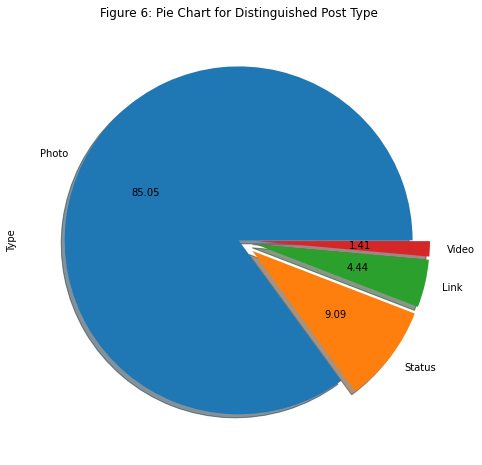

In [ ]:
#draw a pie chart consisting of 4 post content type:

labels = ['Photo','Status','Link' ,'Video']
df['Type'].value_counts().plot(kind = 'pie', autopct = '%.2f', labels = labels, figsize=(8,8), explode = (0,0.1, 0.1, 0.1), shadow=True)
plt.ylabel('Type') 
plt.title('Figure 6: Pie Chart for Distinguished Post Type')

print(df['Type'].value_counts(normalize= True) * 100)

Figure 5 illustrates the impact of the content "Type" on Facebook posts as translated by "Lifetime Post Consumers" and Figure 6 shows the post content distribution across Facebook page.

It is clear that "Status" posts have clearly the largest impact on the performance of the post, twice more than the values of content "Photo" and "Link". While "Photo" represents the largest portion of overall contents, its impact on Lifetime Post Consumers is not significant.

"Video" is the second most popular content on Facebook despite its being the least frequent post type (accounted for 1.41% of overall post contents).

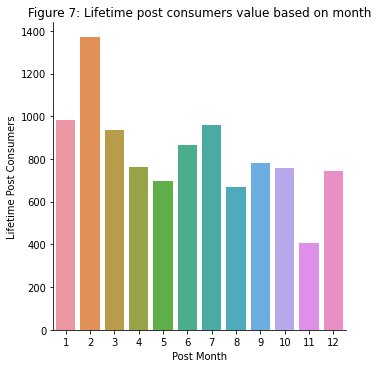

In [ ]:
#create a bar plot to visualize the performance of lifetime post consumers based on different months of the year
sns.catplot(x="Post Month", y="Lifetime Post Consumers", kind="bar", data=df, 
            ci=None).set(title="Figure 7: Lifetime post consumers value based on month")

Figure 7 shows the impact of Post Month on Lifetime Post Consumers. From the chart we can see some seasonality with a peak month on February then decreasing gradually to May before increasing again in June. November is a month that has the lowest impact on Lifetime Post Consumer. 

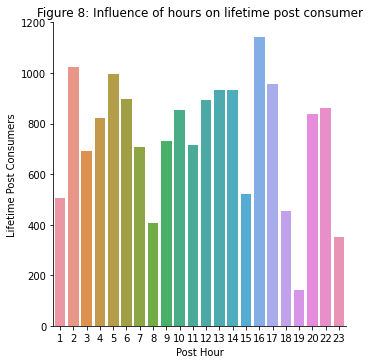

In [ ]:
#create a bar plot to visualize the influence of hours on lifetime post consumers
sns.catplot(x="Post Hour", y="Lifetime Post Consumers", kind="bar", data=df, 
            ci=None).set(title="Figure 8: Influence of hours on lifetime post consumer")

The “Hour” influence graphic appears to show that no trends associated with the hour of publication exists, although some peaks can be observed such as at 16:00, 20:00 and 22:00

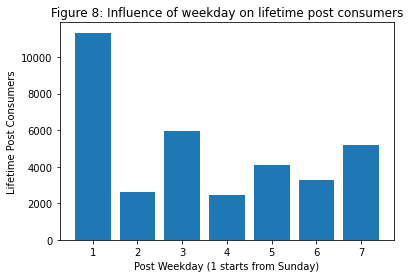

In [ ]:
#create a bar plot to visualize the influence of weekday on lifetime post consumers

fig, ax = plt.subplots()
ax.bar(df["Post Weekday"], df["Lifetime Post Consumers"])
ax.set_xlabel("Post Weekday (1 starts from Sunday)")
ax.set_ylabel("Lifetime Post Consumers")
plt.title("Figure 8: Influence of weekday on lifetime post consumers")

plt.show()


The “Weekday” chart shows that "Sunday" has a maximum of impact on Lifetime Post Consumers. "Tuesday" and "Saturday" also receive higher engagement. It was expected more impact on weekend days, considering users tend to be more available in this period. 

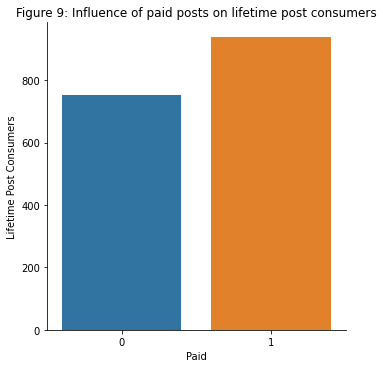

In [ ]:
#create a bar plot to visualize the influence of paid post on lifetime post consumers with 0 = No and 1 = Yes
sns.catplot(x="Paid", y="Lifetime Post Consumers", kind="bar", data=df, ci=None).set(title="Figure 9: Influence of paid posts on lifetime post consumers")

The result shown for “Paid” is expected: a post for which the company paid for advertising has a larger impact than a post not paid. 

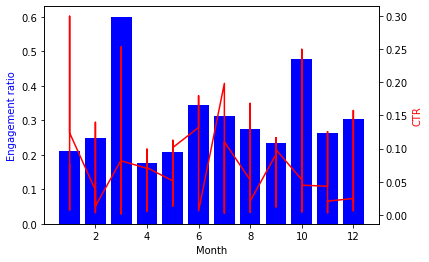

In [ ]:
#create a chart to display engagement ratio and click-through rate
fg, ax = plt.subplots()
ax.bar(df["Post Month"], df["Engagement ratio"], color="blue")
ax.set_xlabel("Month")
ax.set_ylabel("Engagement ratio", color="blue")

ax2 = ax.twinx()
ax2.plot(df["Post Month"], df["CTR"], color="red", linewidth=1.5)
ax2.set_ylabel("CTR", color="red")

plt.show()

A seasonality trend was observed in the chart, it seems that both engagement ratio and click-through rate share the same pattern except the CTR in January was significantly high compared to other months of the year. February, June and October are the months that have high rate of engagement and CTR. The rise of engagement ratio and CTR may also depend on the number of Facebook Ad the brand run on certain month. However, it can be said that both engagement ratio and CTR witnessed an upward trend over the year, which means that brand social media post has sucessfully increase brand consumer engagement and customer relationship management.